In [7]:
import numpy as np
from scipy.integrate import odeint
%matplotlib inline
import  matplotlib.pyplot as plt

Text(0.5, 1.0, 'Conc. vs. Time for HTL of Soy Protein Concentrate')

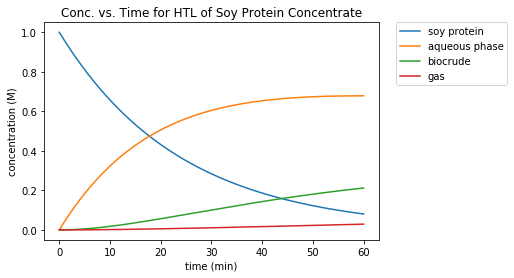

In [16]:
# 200 Celsius, k in 1/min for 1st order reactions
# x1, x2, x3, x4 = mass fractions of soy protein, AP products, biocrude, gas
# k2 and k6 pathways eliminated in new model

def HTL (x, t): 
    k1 = 0.042
    k2 = 0
    k3 = 0.011
    k4 = 0.022
    k5 = 0.00093
    k6 = 0 
    
    dx1dt = -k1*x[0] - k2*x[0]
    dx2dt = k1*x[0] - k3*x[1] - k5*x[1] + k4*x[2]
    dx3dt = k2*x[0] + k3*x[1] - k4*x[2] - k6*x[2]
    dx4dt = k5*x[1] + k6*x[2]
    
    return [dx1dt, dx2dt, dx3dt, dx4dt]

# linspace from t=0 to 5000 minutes, 1000 intervals
t = np.linspace(0,60,3600)

# initial concentrations of soy, AP, biocrude, gas (replace below)
x0 = [1, 0, 0, 0]
concentration = odeint(HTL, x0, t)
# print (concentration)


x1 = concentration[: , 0]
x2 = concentration[: , 1]
x3 = concentration[: , 2] 
x4 = concentration[: , 3]

plt.plot(t, x1, label="soy protein")
plt.plot(t, x2, label="aqueous phase")
plt.plot(t, x3, label="biocrude")
plt.plot(t, x4, label="gas")

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xlabel('time (min)')
plt.ylabel('concentration (M)')
plt.title('Conc. vs. Time for HTL of Soy Protein Concentrate')